In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

# Calculate the combined PM values
data['PM_Combined'] = data['pm2.5_atm'] + data['pm10_atm']

# Group data by area name and calculate the mean for combined PM and medical illness
aggregated_data = data.groupby('Name').agg({'Combined_PM': 'mean', 'MedIllnes': 'mean'}).reset_index()

# Create a scatter plot with annotations
plt.figure(figsize=(12, 8))
for i, row in aggregated_data.iterrows():
    plt.scatter(row['Combined_PM'], row['MedIllnes'], alpha=0.7, edgecolors='w')
    plt.annotate(row['Name'], (row['Combined_PM'], row['MedIllnes']), fontsize=8)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aggregated_data['Combined_PM'], aggregated_data['MedIllnes'])
x = np.array(aggregated_data['Combined_PM'])
y = slope * x + intercept

# Plot the regression line
plt.plot(x, y, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')

# Set labels and title
plt.xlabel('Combined PM Values')
plt.ylabel('Medical Illness')
plt.title('Scatter Plot of Combined PM Values vs. Medical Illness with Linear Regression')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: "Column(s) ['Combined_PM'] do not exist"

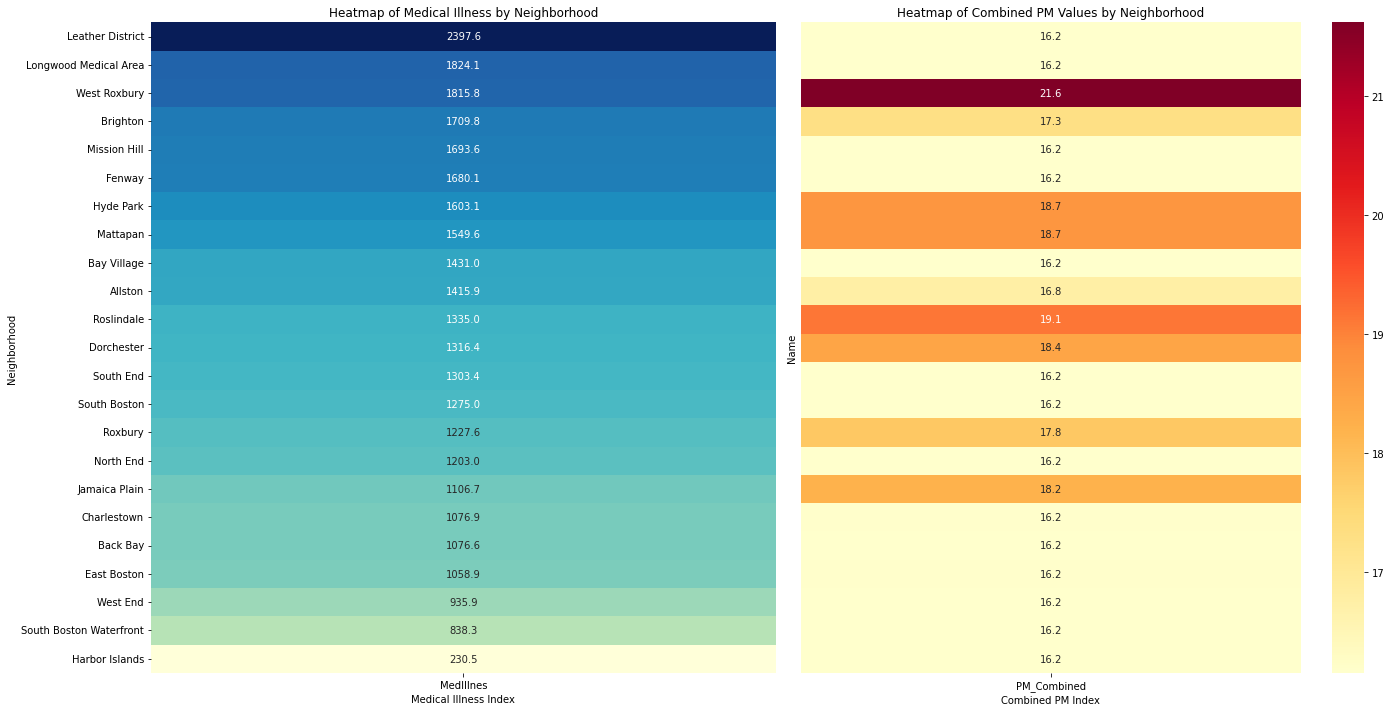

In [20]:
import seaborn as sns

# Calculate mean of 'MedIllnes' and 'PM_Combined' for each neighborhood
neighborhood_means = data.groupby('Name').agg({
    'MedIllnes': 'mean',
    'PM_Combined': 'mean'
}).reset_index()

# Sort both measures independently
med_illness_sorted = neighborhood_means[['Name', 'MedIllnes']].set_index('Name').sort_values('MedIllnes', ascending=False)
pm_combined_sorted = neighborhood_means[['Name', 'PM_Combined']].set_index('Name').loc[med_illness_sorted.index]

# We will use a wider layout to place both heatmaps side by side
plt.figure(figsize=(20, 10))

# First heatmap for 'MedIllnes'
plt.subplot(1, 2, 1)
sns.heatmap(
    med_illness_sorted,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    fmt=".1f"
)
plt.title('Heatmap of Medical Illness by Neighborhood')
plt.xlabel('Medical Illness Index')
plt.ylabel('Neighborhood')

# Second heatmap for 'PM_Combined'
plt.subplot(1, 2, 2)
sns.heatmap(
    pm_combined_sorted,
    annot=True,
    cmap="YlOrRd",
    cbar=True,
    fmt=".1f",
    yticklabels=False  # Hide y-tick labels to avoid repetition
)
plt.title('Heatmap of Combined PM Values by Neighborhood')
plt.xlabel('Combined PM Index')

plt.tight_layout()
plt.show()
